<a href="https://colab.research.google.com/github/KR9-cyber/DAI-101-Assignment/blob/main/Uber_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving uber_stock_data.csv to uber_stock_data.csv


In [3]:

print("Dataset Overview:")
print(df.head())
print(df.info())
print(df.describe())

Dataset Overview:
         Date  Adj Close      Close       High        Low       Open  \
0  2019-05-10  41.570000  41.570000  45.000000  41.060001  42.000000   
1  2019-05-13  37.099998  37.099998  39.240002  36.080002  38.790001   
2  2019-05-14  39.959999  39.959999  39.959999  36.849998  38.310001   
3  2019-05-15  41.290001  41.290001  41.880001  38.950001  39.369999   
4  2019-05-16  43.000000  43.000000  44.060001  41.250000  41.480000   

      Volume  
0  186322500  
1   79442400  
2   46661100  
3   36086100  
4   38115500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1444 non-null   object 
 1   Adj Close  1444 non-null   float64
 2   Close      1444 non-null   float64
 3   High       1444 non-null   float64
 4   Low        1444 non-null   float64
 5   Open       1444 non-null   float64
 6   Volume     1444 non-null   i

In [4]:

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


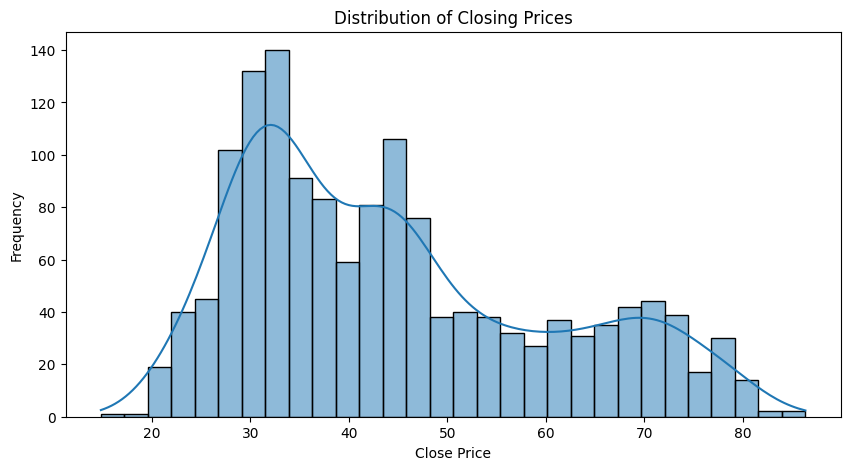

In [5]:

plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

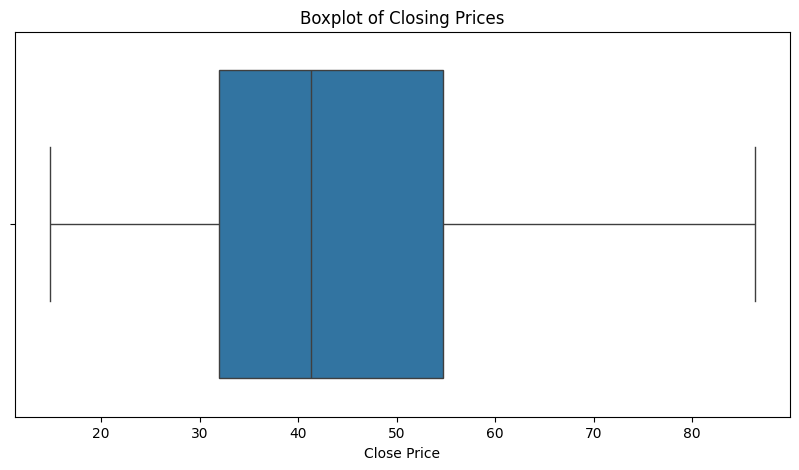

In [6]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Closing Prices")
plt.xlabel('Close Price')
plt.show()

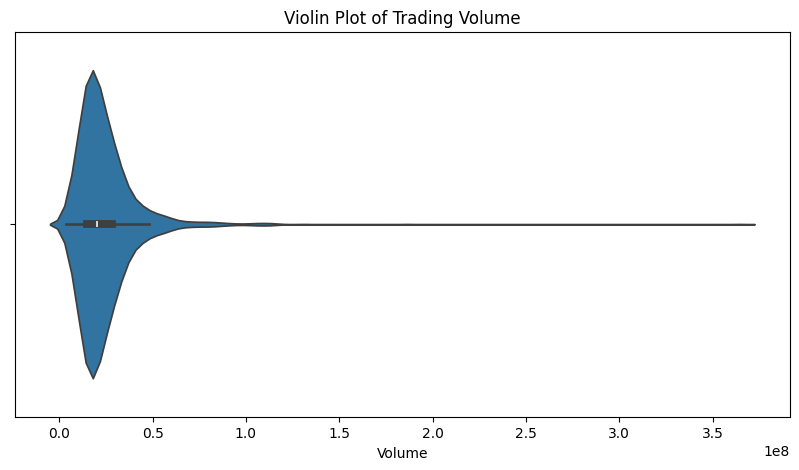

In [7]:

plt.figure(figsize=(10, 5))
sns.violinplot(x=df['Volume'])
plt.title("Violin Plot of Trading Volume")
plt.xlabel('Volume')
plt.show()

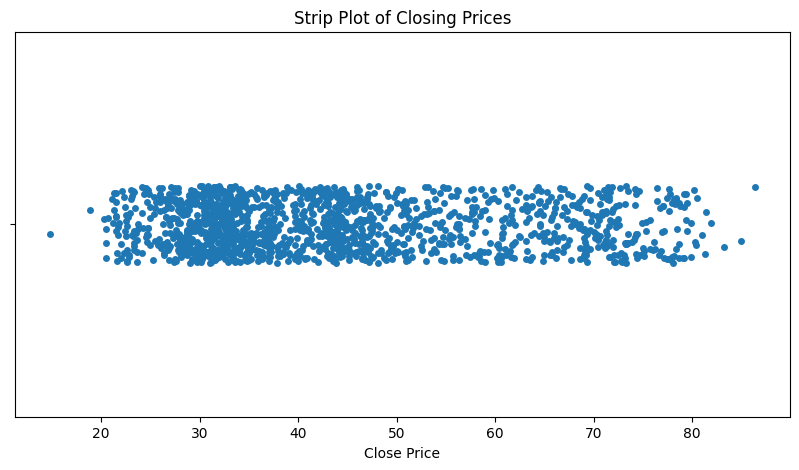

In [8]:

plt.figure(figsize=(10, 5))
sns.stripplot(x=df['Close'], jitter=True)
plt.title('Strip Plot of Closing Prices')
plt.xlabel('Close Price')
plt.show()

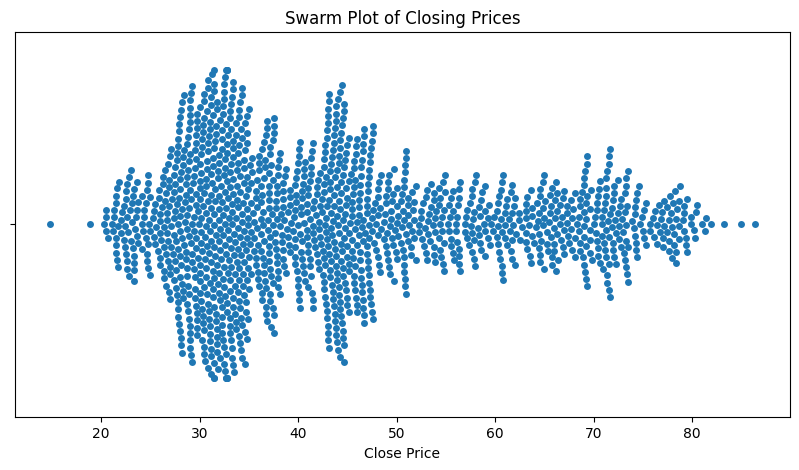

In [9]:

plt.figure(figsize=(10, 5))
sns.swarmplot(x=df['Close'])
plt.title('Swarm Plot of Closing Prices')
plt.xlabel('Close Price')
plt.show()

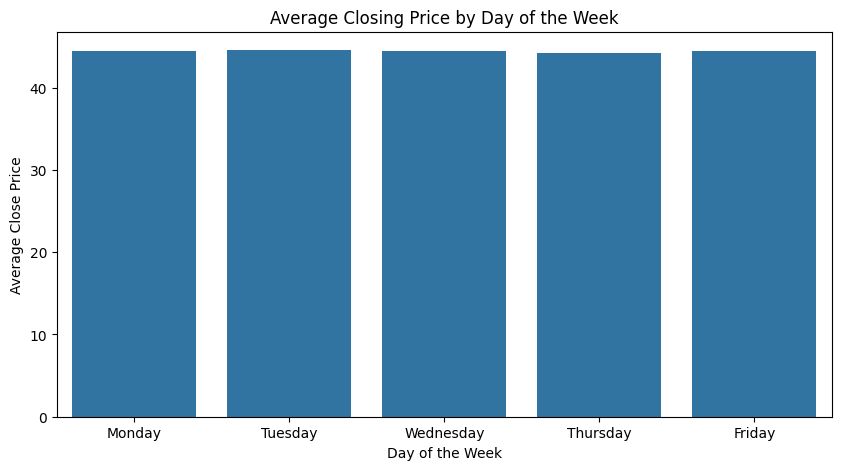

In [10]:

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['DayOfWeek'] = df['Date'].dt.day_name()
    plt.figure(figsize=(10, 5))
    sns.barplot(x='DayOfWeek', y='Close', data=df, estimator=np.mean, errorbar=None,
                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.title("Average Closing Price by Day of the Week")
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Close Price')
    plt.show()
else:
    print("No Date column found for categorical analysis.")

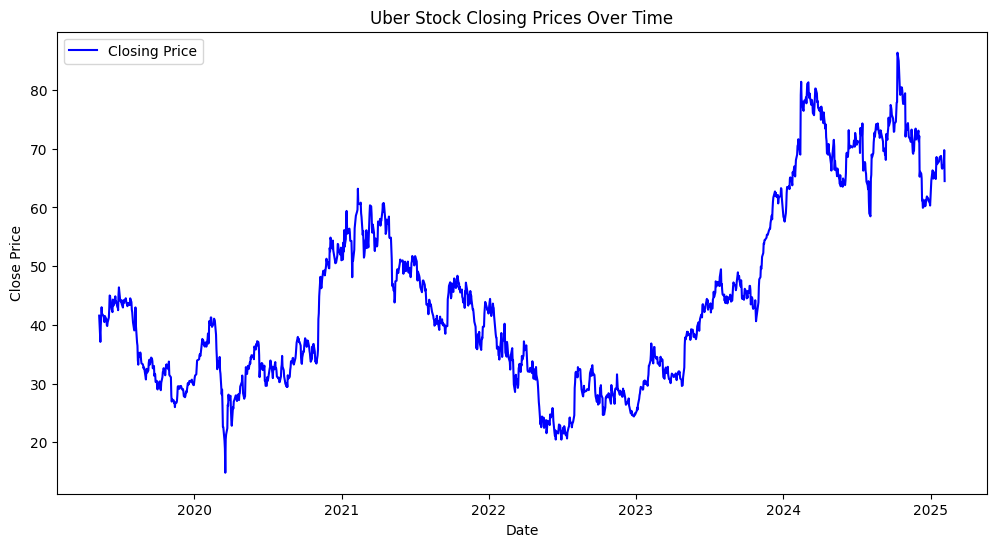

In [11]:

if 'Date' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
    plt.title('Uber Stock Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
else:
    print("No Date column found for time series analysis.")


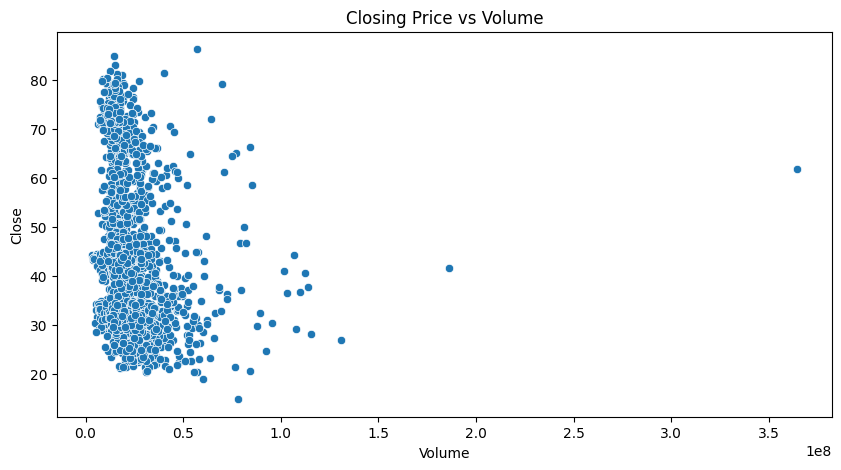

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title("Closing Price vs Volume")
plt.show()

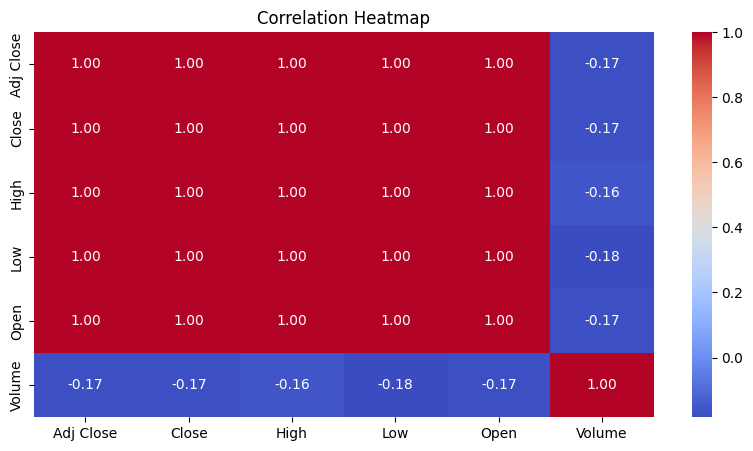

In [13]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

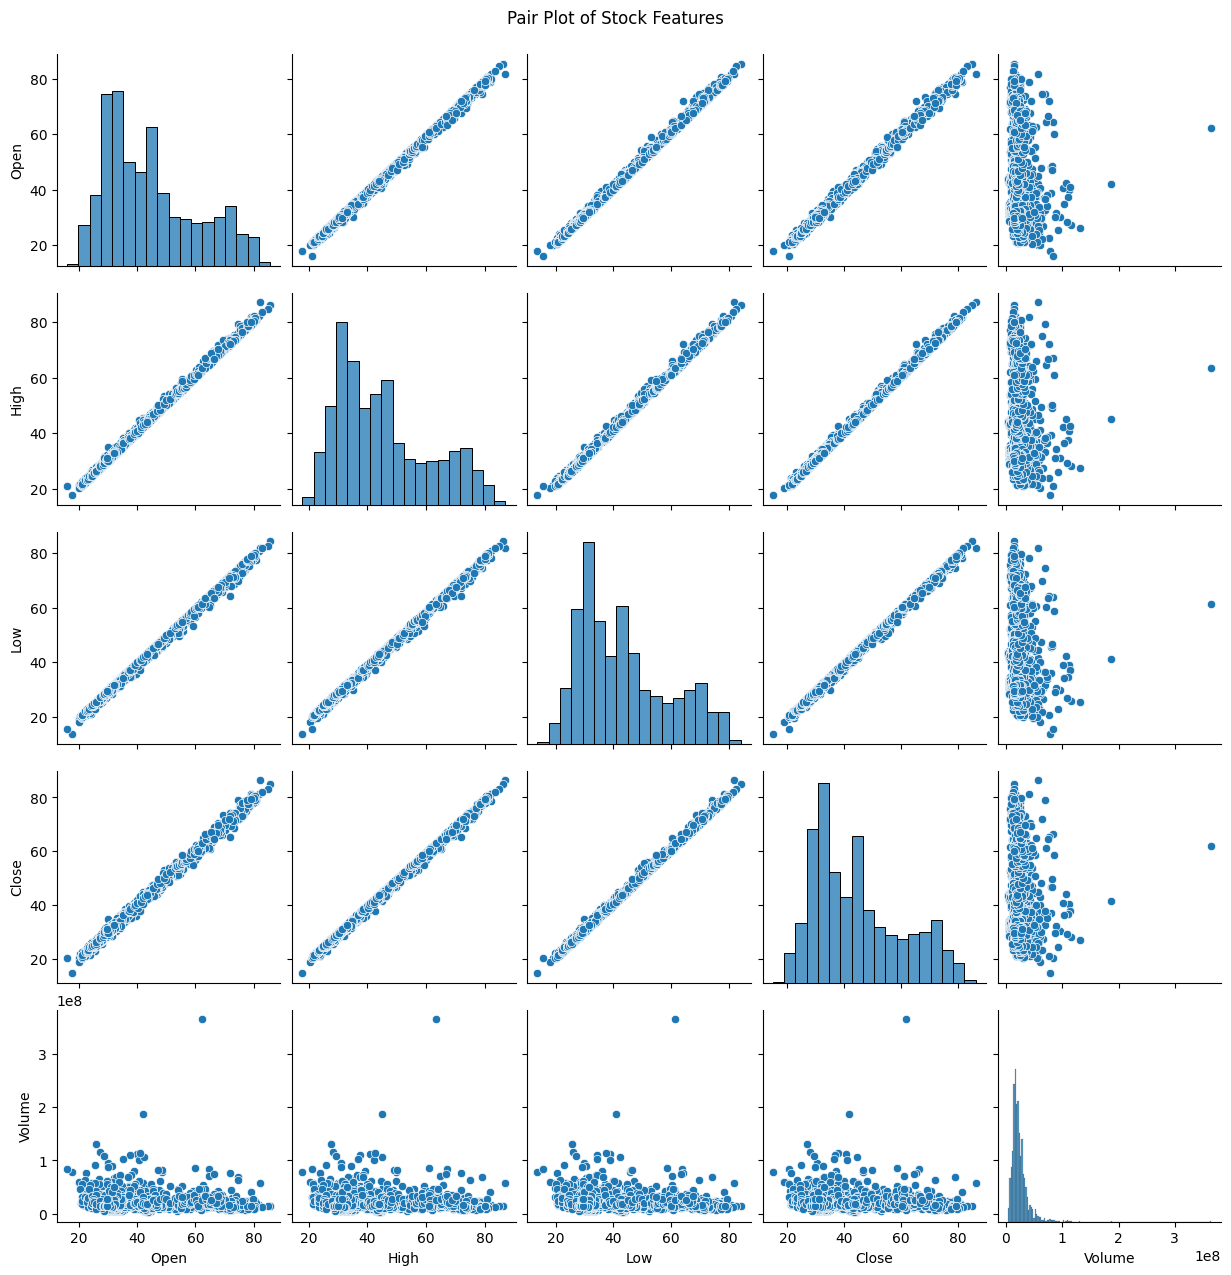

In [14]:

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Stock Features', y=1.02)
plt.show()

In [15]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
x = df[features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [16]:
final_df = pd.concat([principal_df, df[['Date']]], axis=1)


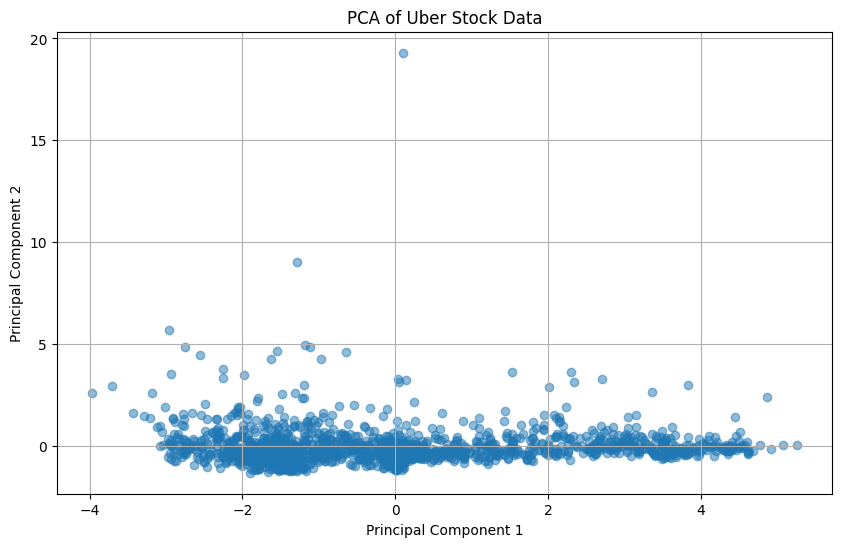

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], alpha=0.5)
plt.title('PCA of Uber Stock Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [18]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')

Explained variance by component: [0.80699925 0.19226205]


In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_df)
principal_df['Cluster'] = kmeans.labels_

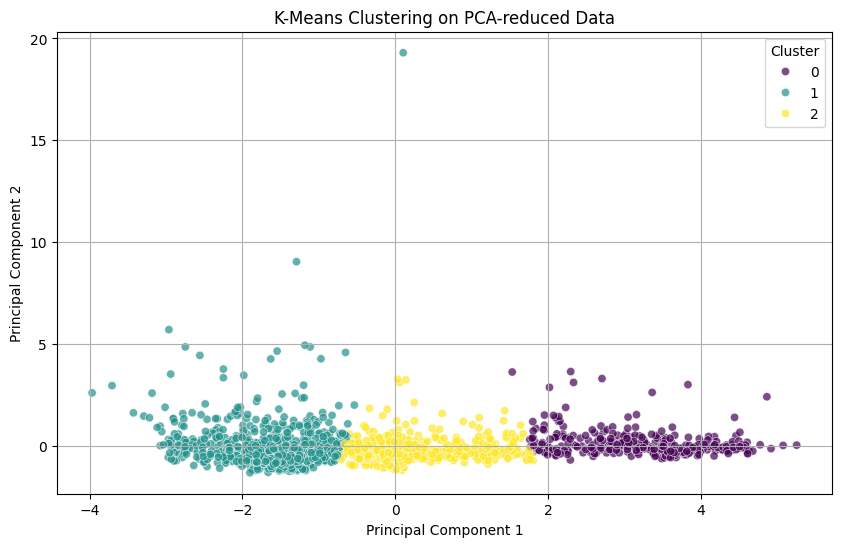

Cluster Centers:
[[ 3.18802226  0.14763553]
 [-1.70865625  0.06118457]
 [ 0.34722106 -0.19116383]]


In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_df['Principal Component 1'], y=principal_df['Principal Component 2'],
                hue=principal_df['Cluster'], palette='viridis', alpha=0.7)
plt.title('K-Means Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)
